In [38]:
#M4.4XLarge EC2
import pandas as pd
import numpy as np
import re
import string
import sys
import os
import datetime

import requests

import matplotlib.pyplot as plt
#import seaborn as sns

from collections import Counter

plt.style.use('ggplot')
%matplotlib inline


In [2]:
#Looking at resources requested for each project
f = open('./data/opendata_donations.csv')
header = f.readline().split(',')

header = [c.strip() for c in header]
donations_raw = f.read()
f.close()

donations_row_text = re.split('"\n"', donations_raw)
del donations_raw

donations_for_df = []
for row in donations_row_text:
    donations_for_df.append(re.split('","', row))
del donations_row_text

donations = pd.DataFrame(donations_for_df, columns=header)
del donations_for_df

In [4]:
donations.iloc[0,0] = donations.iloc[0,0][1:] #fixes the parsing issue
donations.iloc[-1,-1] = donations.iloc[-1,-1][:-2] #fixes the parsing issue

In [40]:
donations.head()

,_donationid,_projectid,_donor_acctid,_cartid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,...,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,thank_you_packet_mailed,donation_message
0,000009891526c0ade7180f8423792063,26f02742185eb1f73f3bc5be4655fae2,c91489d7b6b89943a28555e6add72509,2b188e02e8886c1bb2708bc56f6a3d2f,,NJ,070,t,2013-05-26 11:28:31.30,63.75,...,t,creditcard,f,f,f,t,f,f,f,
1,00000ce845c00cbf0686c992fc369df4,7be7184572a67468a2ef4402e7de6c99,01e2385f52c03386ee345c517be8f84e,,,NY,,f,2011-12-09 18:36:26.79,21.25,...,t,promo_code_match,f,f,f,f,f,f,f,Friends and Family matching donation provided ...
2,0000174d1d38072889d47e51b587a10c,fbef21e4fdf303eebe6c48b99ef9de8f,f495e99822acc50e934a57943400bcfe,db07e0db53dfa402c4a2aa02d46583d4,San Francisco,CA,941,f,2011-12-15 01:07:26.085,1817.36,...,t,no_cash_received,t,f,f,f,t,f,f,Chevron is committed to securing California’s ...
3,0000219e4b37d2504fb6b8c28e24a2d4,b4afbc05ce9ff8420c176810bd59db79,d63c0d8e5b76530d476486e3336e1f3c,9bd9e83716ecd6bee6e467e9b82964ab,Ballwin,MO,630,f,2012-03-01 18:29:59.269,40.43,...,t,paypal,f,f,f,f,f,f,f,I donated because the project will bring impor...
4,0000300773fe015f870914b42528541b,f8fac919961560831eac7e5dd05c872d,e0dd67c660dc50ec1b2dadf37f3c65d4,,,NY,100,f,2014-08-14 18:54:57.663,21.25,...,t,promo_code_match,f,f,f,f,t,f,f,Courtesy of an anonymous donor. Best of luck w...


In [41]:
d = donations[['_donationid', '_donor_acctid']].groupby('_donor_acctid').count()

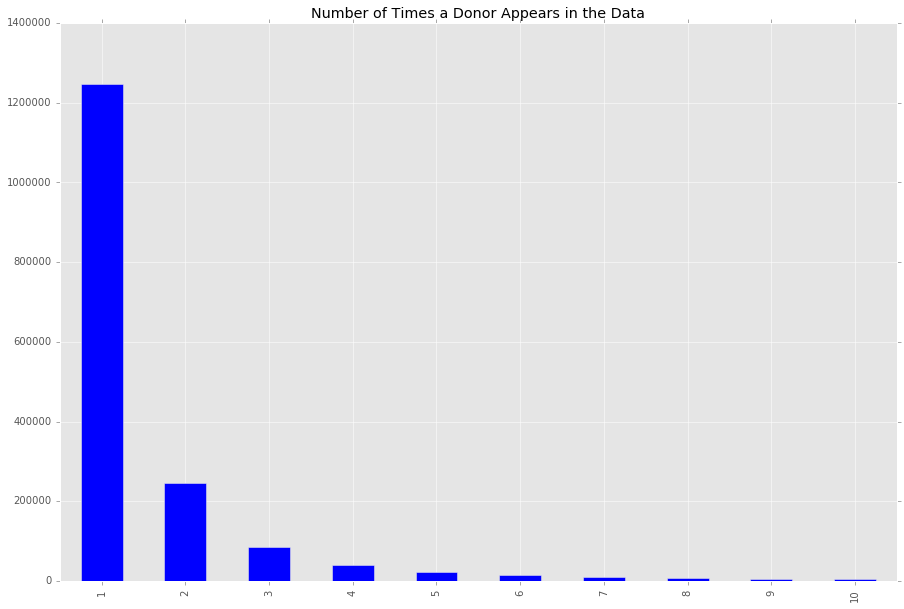

In [42]:
d._donationid.value_counts()[:10].plot(figsize=(15,10), kind='bar')
plt.title('Number of Times a Donor Appears in the Data')

In [43]:
d.sort('_donationid', ascending=False).head(20) #Top 20 Donor IDs

/home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,_donationid
_donor_acctid,
e0dd67c660dc50ec1b2dadf37f3c65d4,94686
68c355078d2e13b3d0ec6f887f9bca9c,93386
41d1e5bcc907b51150887d8fe591ffa3,90754
d521928ee75d2c34ace4949bd250d6ee,57110
f016d149d1910994193078c4cce1c9eb,49985
af50cb46f3d253b2f65e07e4ad901453,20887
88ea0473fdeb2e2cf3e700b779e59e35,19942
038341ecaec6cfe0953de53a101b1a83,16788
01e2385f52c03386ee345c517be8f84e,14233


In [11]:
donations.columns

Index([u'_donationid', u'_projectid', u'_donor_acctid', u'_cartid',
       u'donor_city', u'donor_state', u'donor_zip', u'is_teacher_acct',
       u'donation_timestamp', u'donation_to_project',
       u'donation_optional_support', u'donation_total', u'dollar_amount',
       u'donation_included_optional_support', u'payment_method',
       u'payment_included_acct_credit', u'payment_included_campaign_gift_card',
       u'payment_included_web_purchased_gift_card',
       u'payment_was_promo_matched', u'via_giving_page', u'for_honoree',
       u'thank_you_packet_mailed', u'donation_message'],
      dtype='object')

In [36]:
d.index[0]

'f'

In [37]:
donations.donation_total = donations.donation_total.astype('float')

In [35]:
print min(donations.donation_total), max(donations.donation_total)

-15.0 169200.0


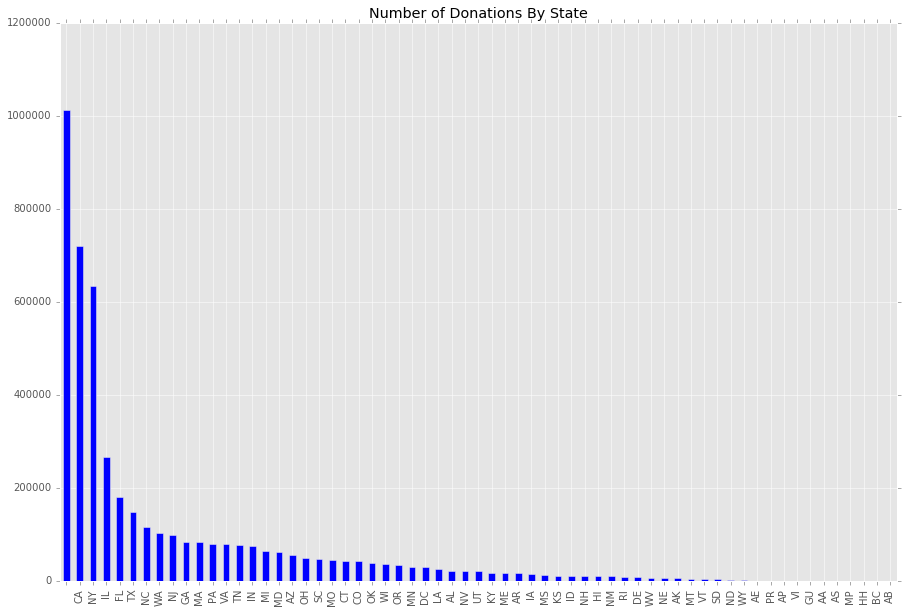

In [44]:
donations.donor_state.value_counts().plot(kind = 'bar', figsize = (15,10))
plt.title('Number of Donations By State')

In [45]:
donations[['donation_total','payment_was_promo_matched']].head()

,donation_total,payment_was_promo_matched
0,75.00,t
1,25.00,f
2,2138.07,f
3,47.56,f
4,25.00,f


In [47]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631338 entries, 0 to 4631337
Data columns (total 23 columns):
_donationid                                 object
_projectid                                  object
_donor_acctid                               object
_cartid                                     object
donor_city                                  object
donor_state                                 object
donor_zip                                   object
is_teacher_acct                             object
donation_timestamp                          object
donation_to_project                         object
donation_optional_support                   object
donation_total                              float64
dollar_amount                               object
donation_included_optional_support          object
payment_method                              object
payment_included_acct_credit                object
payment_included_campaign_gift_card         object
payment_included_we

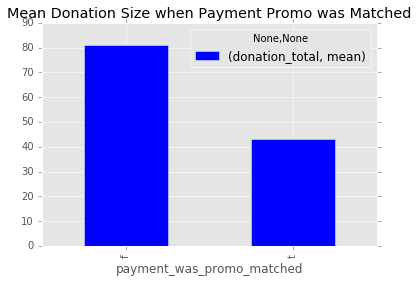

In [48]:
d = donations[['donation_total','payment_was_promo_matched']].groupby('payment_was_promo_matched')\
.agg({'donation_total':[np.mean]})
d.plot(kind='bar')
plt.title('Mean Donation Size when Payment Promo was Matched')
plt.show()

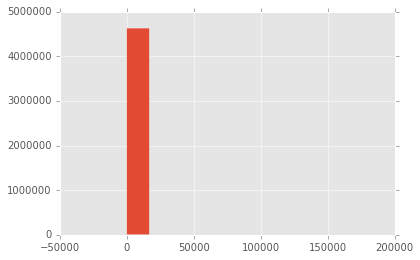

In [49]:
donations.donation_total.hist()
#plt.xlim()

In [50]:
d = donations.donation_total

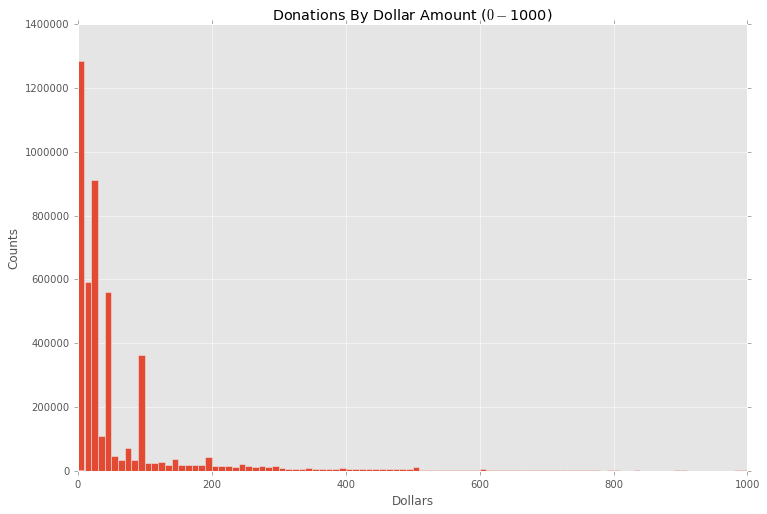

In [52]:
d[(d < 1000) & (d > 0)].hist(bins = 100, figsize = (12,8))
plt.xlim(0,1000)
plt.title('Donations By Dollar Amount ($0 - $1000)')
plt.xlabel('Dollars')
plt.ylabel('Counts')
plt.show()

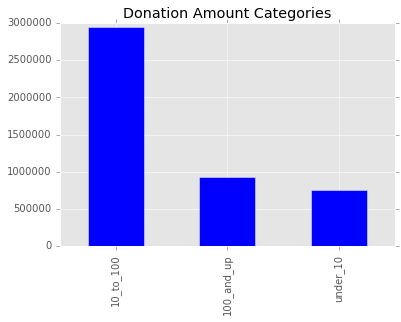

In [63]:
donations['dollar_amount'].value_counts().plot(kind='bar')
plt.title('Donation Amount Categories')
plt.show()

Additional Questions:

Do donors typically donate to schools in their own state?
Do donors typically donate to a specific subject category?
Generate Pivot tables for each type type and join and then generate an additional model?

In [ ]:
#TRY TO USE THEIR API TO QUERY MORE INFORMATION ABOUT DONORS
txt = 'http://api.donorschoose.org/common/json_feed.html?keywords=%E2%80%9DCanoga+Park%E2%80%9D&APIKey=DONORSCHOOSE'
r = requests.get(txt)
print r.url
print r.content

In [ ]:
r = requests.get('http://api.donorschoose.org/common/json-donor.html',params={'APIKey':'DONORSCHOOSE', 'donorid':d.index[0]})